# Customer Churn Prediction

## Name: Rose Poolakade

## Organization: Entri Elevate

## Date: 30-03-2025

## 1. Overview of Problem Statement

### Customer churn prediction is crucial for businesses to retain customers and enhance customer satisfaction.The goal is to develop a machine learning model that predicts whether a customer will churn based on various attributes such as call usage,service plans,and customer demographics.


## 2. Objective

### To build a predictive model that identifies customers at risk of churning using machine learning techniques.


## 3. Data Description

### Source: https://data.world/bob-wakefield/call-center-data

### Features: The dataset contains customer-related features,including:

#### total_day_minutes,total_eve_minutes,total_night_minutes: Call duration in different time segments.

#### total_day_charge,total_eve_charge,total_night_charge: Charges for calls.

#### international_plan,voice_mail_plan: Subscription details.

#### churn: Target variable (1 = Churn,0 = No Churn).

## 4. Data Collection

#### Dataset was collected from the data.world.Dataset was imported using pandas (by read_csv function)

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Load the dataset

df = pd.read_csv("customer_data_edited.csv")

In [8]:
# Display the first few lines of the dataset
df.head()

,recordID,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,customer_id
0,1,HI,101,510,no,no,0,70.9,123,12.05,...,18.01,236.0,73,10.62,10.6,3,2.86,3,no,23383607.0
1,2,MT,137,510,no,no,0,223.6,86,38.01,...,20.81,94.2,81,4.24,9.5,7,2.57,0,no,22550362.0
2,3,OH,103,408,no,yes,29,294.7,95,50.10,...,20.17,300.3,127,13.51,13.7,6,3.70,1,no,59063354.0
3,4,NM,99,415,no,no,0,216.8,123,36.86,...,10.74,220.6,82,9.93,15.7,2,4.24,1,no,25464504.0
4,5,SC,108,415,no,no,0,197.4,78,33.56,...,10.54,204.5,107,9.20,7.7,4,2.08,2,no,691824.0


In [9]:
# Display the last few rows of the dataset
df.tail()

,recordID,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,customer_id
12887,12888,MT,25,415,no,no,0,134.3,98,22.83,...,17.20,195.9,100,8.82,12.6,5,3.40,2,no,3785730.0
12888,12889,MT,113,415,no,no,0,215.9,93,36.70,...,20.41,156.7,123,7.05,4.9,5,1.32,3,no,25171109.0
12889,12890,ID,88,415,no,yes,31,181.6,91,30.87,...,18.12,207.8,104,9.35,11.4,4,3.08,1,no,12126991.0
12890,12891,AK,120,415,no,no,0,178.4,97,30.33,...,14.31,120.5,93,5.42,9.3,9,2.51,1,no,33084674.0
12891,12892,UT,74,415,no,no,0,106.4,84,18.09,...,11.92,90.9,81,4.09,11.4,3,3.08,1,no,28432623.0


In [10]:
# Get basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12892 entries, 0 to 12891
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   recordID                       12892 non-null  int64  
 1   state                          12892 non-null  object 
 2   account_length                 12892 non-null  int64  
 3   area_code                      12892 non-null  int64  
 4   international_plan             12892 non-null  object 
 5   voice_mail_plan                12892 non-null  object 
 6   number_vmail_messages          12892 non-null  int64  
 7   total_day_minutes              12892 non-null  float64
 8   total_day_calls                12892 non-null  int64  
 9   total_day_charge               12892 non-null  float64
 10  total_eve_minutes              12892 non-null  float64
 11  total_eve_calls                12892 non-null  int64  
 12  total_eve_charge               12892 non-null 

In [11]:
# Get the shape of the dataset
df.shape

(12892, 22)

## Insights
#### Used pd.read_csv() to read dataset.
#### Verify number of rows and columns using df.shape.
#### Dataset contains 12892 rows and 22 columns.
#### Used df.info() to check data types and proper formatting.

## 5. Data Preprocessing - Data Cleaning

In [14]:
# Check for null values
df.isnull().sum()

recordID                         0
state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
customer_id                      0
dtype: int64

In [15]:
# Check for duplicate values
df.duplicated().sum()

0

## Summary After Data Preprocessing

#### No Missing Values:The dataset was checked, and no null values were found.

#### No Duplicate Records:Verified and confirmed that there were no duplicate rows.


## 6. Exploratory Data Analysis (EDA)
##### EDA is the process of analyzing and visualizing a dataset to understand its structure,patterns,relationships,and potential anomalies. 
##### It helps in gaining insights that can guide feature selection and model building.

In [18]:
# Get statistical summary of numerical columns 
df.describe()

,recordID,account_length,area_code,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,customer_id
count,12892.00000,12892.000000,12892.000000,12892.000000,12892.000000,12892.000000,12892.000000,12892.000000,12892.000000,12892.000000,12892.000000,12892.000000,12892.000000,12892.000000,12892.000000,12892.000000,12892.000000,1.289200e+04
mean,6446.50000,100.676621,437.133804,7.996665,180.162023,100.266599,30.628086,200.711852,100.137139,17.060717,200.557834,100.038241,9.025192,10.244702,4.467654,2.766584,1.563683,2.830245e+11
std,3721.74417,39.806413,42.341820,13.641977,54.207056,19.946657,9.215171,50.781851,19.894032,4.316445,50.632872,19.749714,2.278507,2.782623,2.466493,0.751269,1.310606,3.205835e+13
min,1.00000,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.400000e+01
25%,3223.75000,73.000000,408.000000,0.000000,144.000000,87.000000,24.480000,166.200000,87.000000,14.130000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,2.409909e+07
50%,6446.50000,100.000000,415.000000,0.000000,180.000000,101.000000,30.600000,201.150000,100.000000,17.095000,200.800000,100.000000,9.040000,10.300000,4.000000,2.780000,1.000000,3.219535e+07
75%,9669.25000,127.000000,510.000000,19.000000,216.300000,114.000000,36.770000,234.900000,114.000000,19.970000,235.100000,113.000000,10.580000,12.100000,6.000000,3.270000,2.000000,5.535319e+07
max,12892.00000,243.000000,510.000000,52.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,3.640000e+15


In [19]:
numeric = df.select_dtypes("number")
numeric

,recordID,account_length,area_code,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,customer_id
0,1,101,510,0,70.9,123,12.05,211.9,73,18.01,236.0,73,10.62,10.6,3,2.86,3,23383607.0
1,2,137,510,0,223.6,86,38.01,244.8,139,20.81,94.2,81,4.24,9.5,7,2.57,0,22550362.0
2,3,103,408,29,294.7,95,50.10,237.3,105,20.17,300.3,127,13.51,13.7,6,3.70,1,59063354.0
3,4,99,415,0,216.8,123,36.86,126.4,88,10.74,220.6,82,9.93,15.7,2,4.24,1,25464504.0
4,5,108,415,0,197.4,78,33.56,124.0,101,10.54,204.5,107,9.20,7.7,4,2.08,2,691824.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12887,12888,25,415,0,134.3,98,22.83,202.3,109,17.20,195.9,100,8.82,12.6,5,3.40,2,3785730.0
12888,12889,113,415,0,215.9,93,36.70,240.1,85,20.41,156.7,123,7.05,4.9,5,1.32,3,25171109.0
12889,12890,88,415,31,181.6,91,30.87,213.2,120,18.12,207.8,104,9.35,11.4,4,3.08,1,12126991.0
12890,12891,120,415,0,178.4,97,30.33,168.3,113,14.31,120.5,93,5.42,9.3,9,2.51,1,33084674.0


In [20]:
cat_data = df.select_dtypes(include="object")
cat_data

,state,international_plan,voice_mail_plan,churn
0,HI,no,no,no
1,MT,no,no,no
2,OH,no,yes,no
3,NM,no,no,no
4,SC,no,no,no
...,...,...,...,...
12887,MT,no,no,no
12888,MT,no,no,no
12889,ID,no,yes,no
12890,AK,no,no,no


In [21]:
cat_data.isnull().sum()

state                 0
international_plan    0
voice_mail_plan       0
churn                 0
dtype: int64

In [22]:
df.churn.value_counts()

churn
no     11069
yes     1823
Name: count, dtype: int64

In [23]:
numeric_columns=list(numeric)
numeric_columns

['recordID',
 'account_length',
 'area_code',
 'number_vmail_messages',
 'total_day_minutes',
 'total_day_calls',
 'total_day_charge',
 'total_eve_minutes',
 'total_eve_calls',
 'total_eve_charge',
 'total_night_minutes',
 'total_night_calls',
 'total_night_charge',
 'total_intl_minutes',
 'total_intl_calls',
 'total_intl_charge',
 'number_customer_service_calls',
 'customer_id']

In [24]:
df.select_dtypes(include = ["number"]).skew().sort_values(ascending=False)


customer_id                      113.542896
total_intl_calls                   1.348923
number_vmail_messages              1.288646
area_code                          1.129295
number_customer_service_calls      1.070848
account_length                     0.103428
total_night_calls                  0.014347
total_night_minutes                0.006204
total_night_charge                 0.006188
recordID                           0.000000
total_day_minutes                 -0.021381
total_day_charge                  -0.021381
total_eve_charge                  -0.026015
total_eve_minutes                 -0.026042
total_eve_calls                   -0.046818
total_day_calls                   -0.091077
total_intl_minutes                -0.229942
total_intl_charge                 -0.230140
dtype: float64

<Axes: >

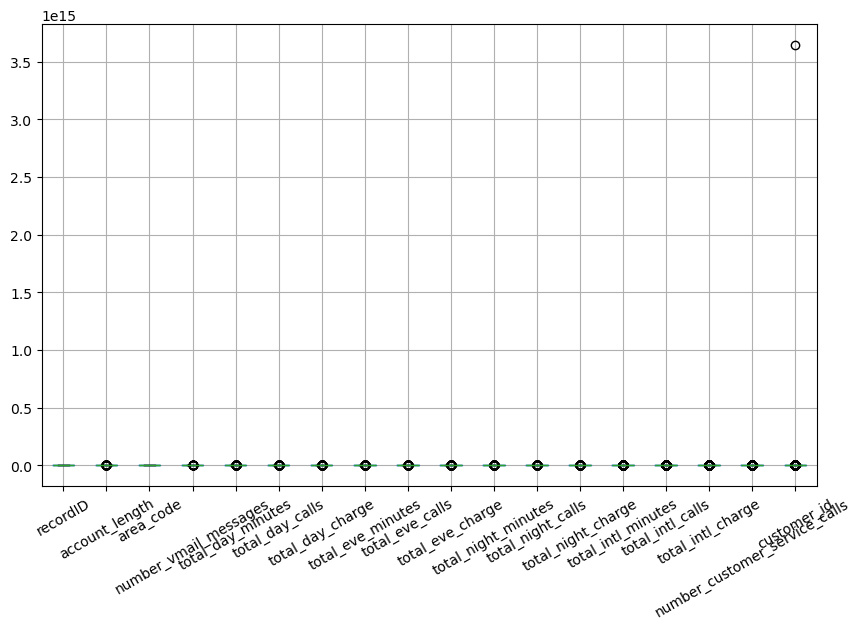

In [25]:
df.boxplot(figsize = (10,6),rot = 30)

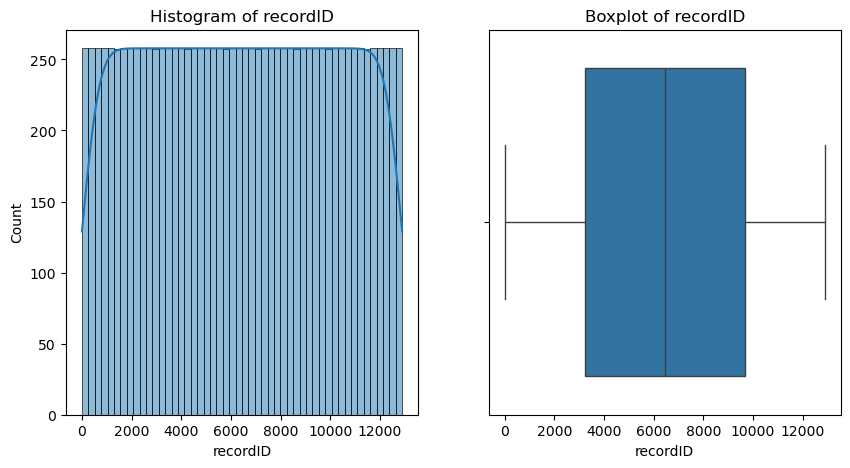

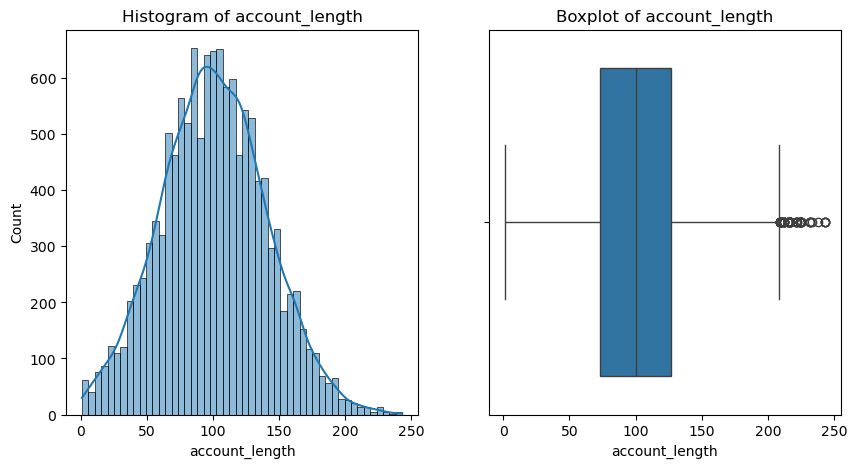

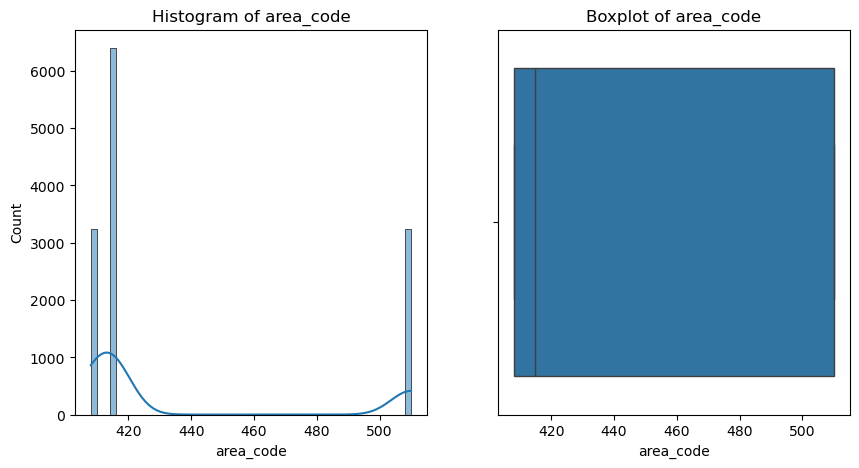

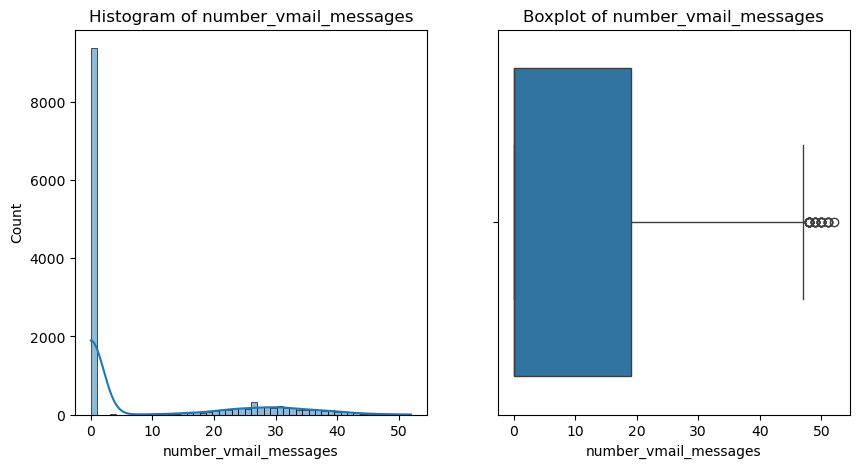

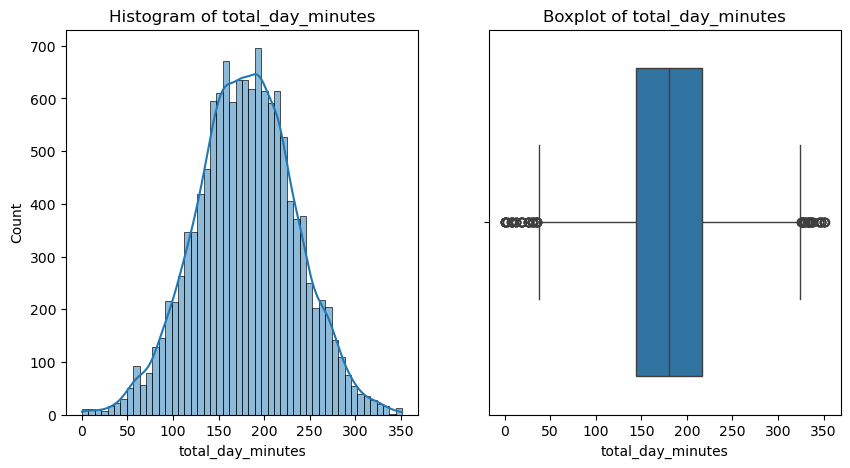

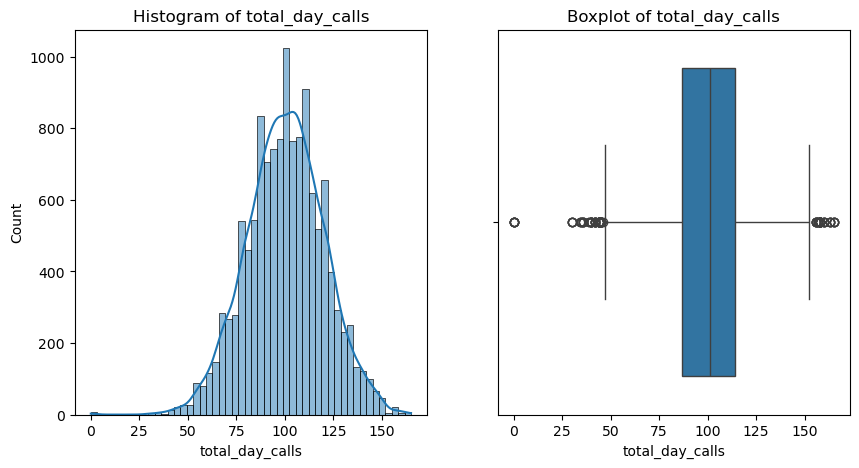

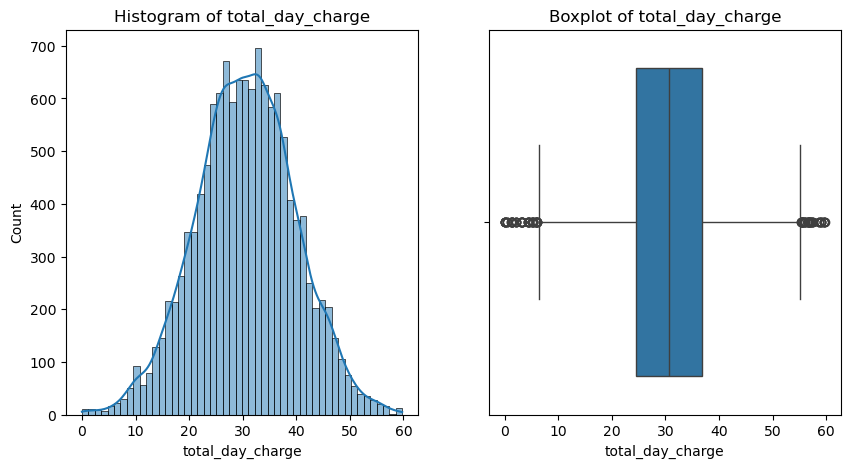

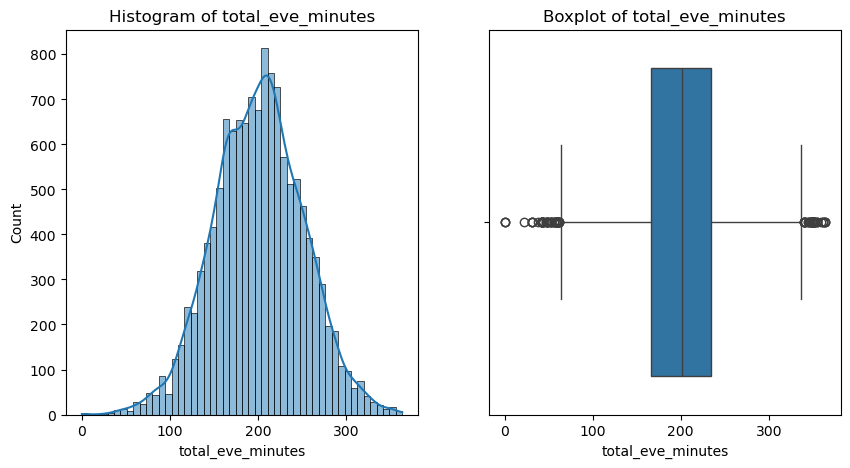

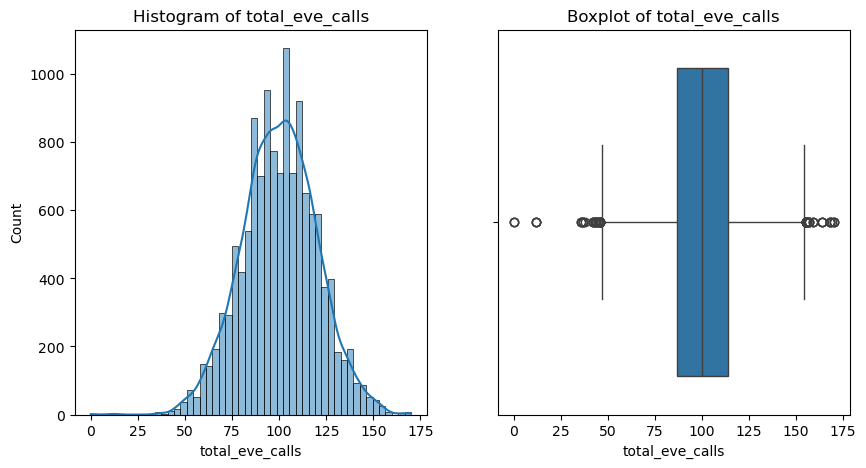

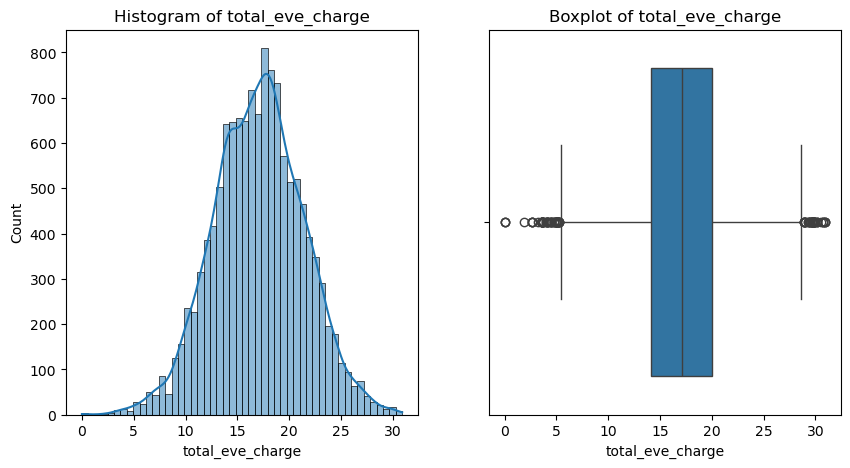

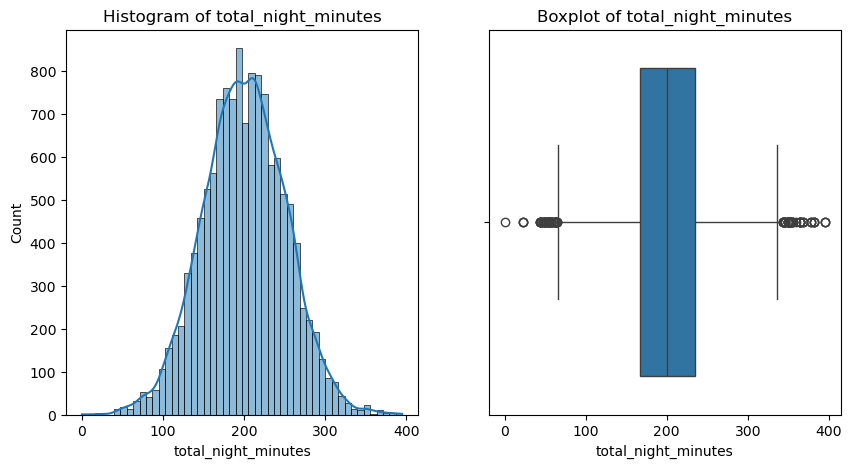

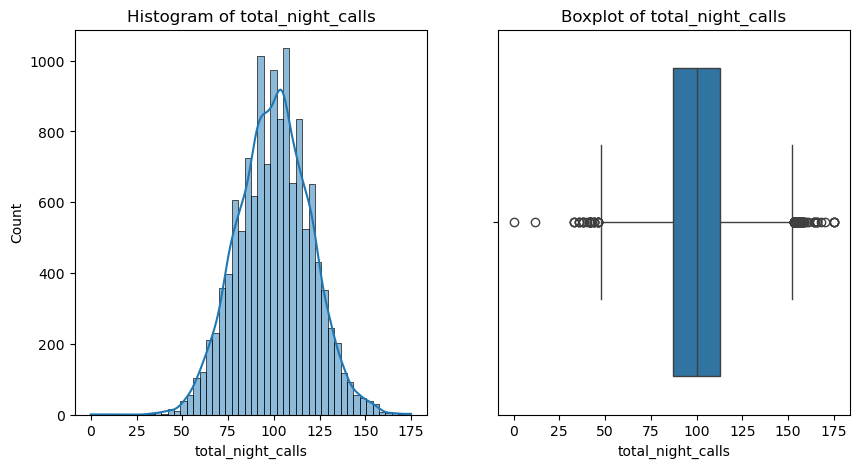

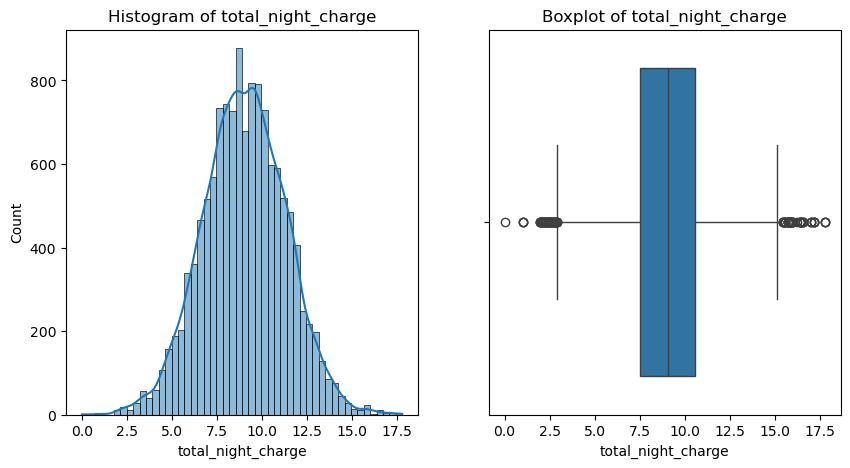

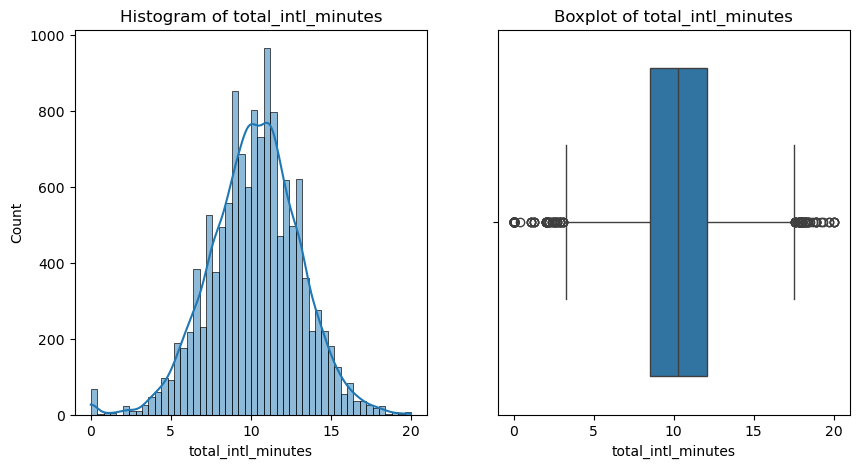

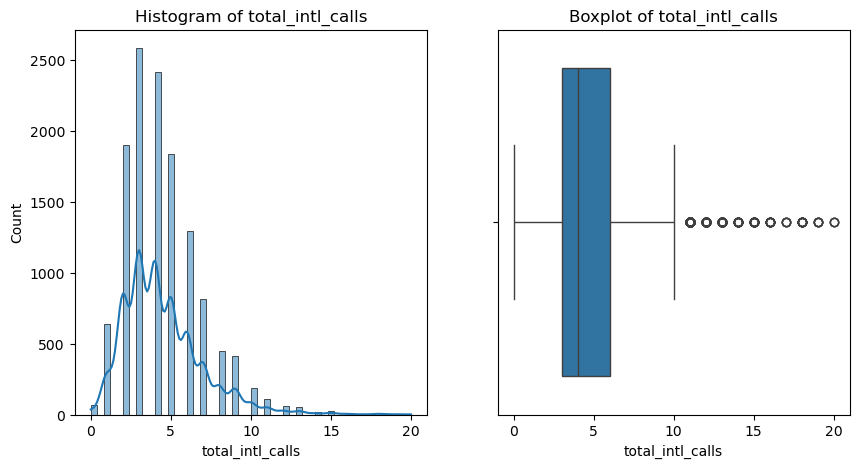

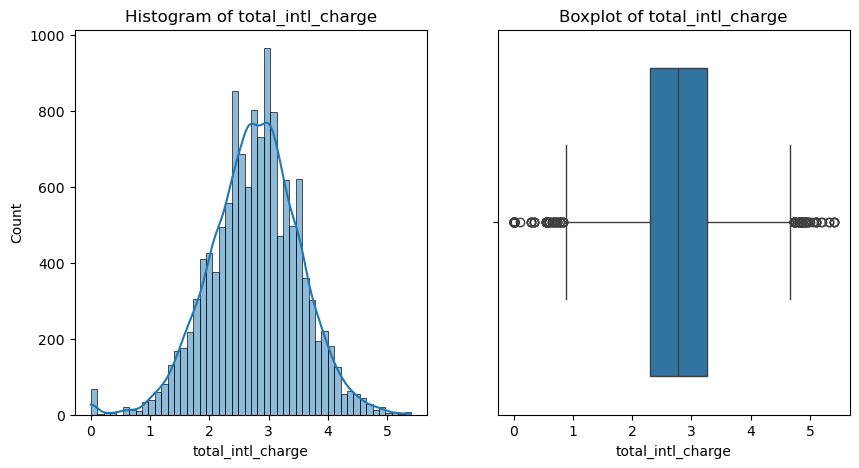

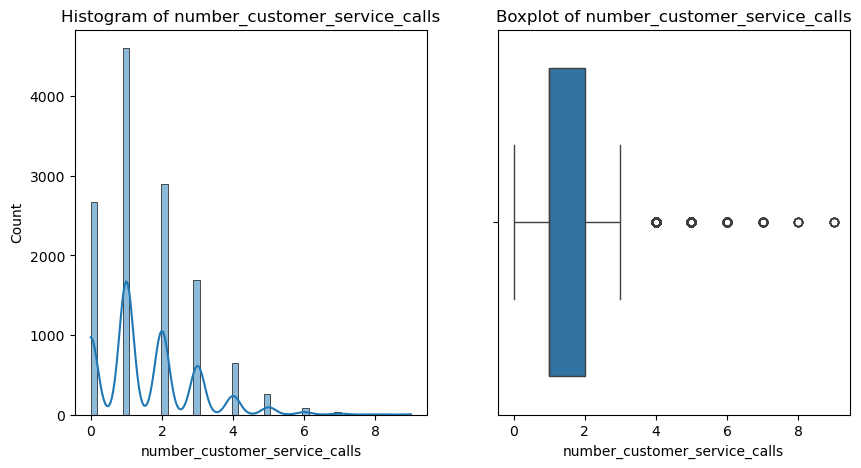

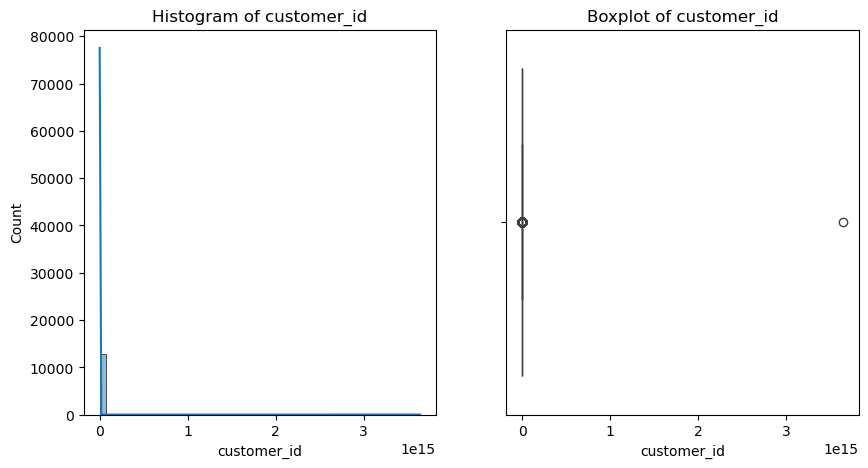

In [26]:
for column in numeric_columns:
    plt.figure(figsize=(10,5))

    # Histogram
    plt.subplot(1,2,1)
    sns.histplot(df[column],bins=50,kde=True)
    plt.title(f'Histogram of {column}')

    # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    
    plt.show()

#### Removing outliers using IQR method

In [28]:
# Function to remove outliers using IQR method

def remove_outliers_iqr(data,column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    # Lower and upper bound for outlier detection
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Return a filtered DataFrame that excludes outliers
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Start with the original data
cleaned_data = df.copy()  # Create a copy for cleaning

# Remove outliers for each numeric column
for column in numeric_columns:
    cleaned_data = remove_outliers_iqr(cleaned_data,column)

# Display before and after shape
print(f"Original dataset shape: {df.shape}")
print(f"Cleaned dataset shape: {cleaned_data.shape}")

Original dataset shape: (12892, 22)
Cleaned dataset shape: (10242, 22)


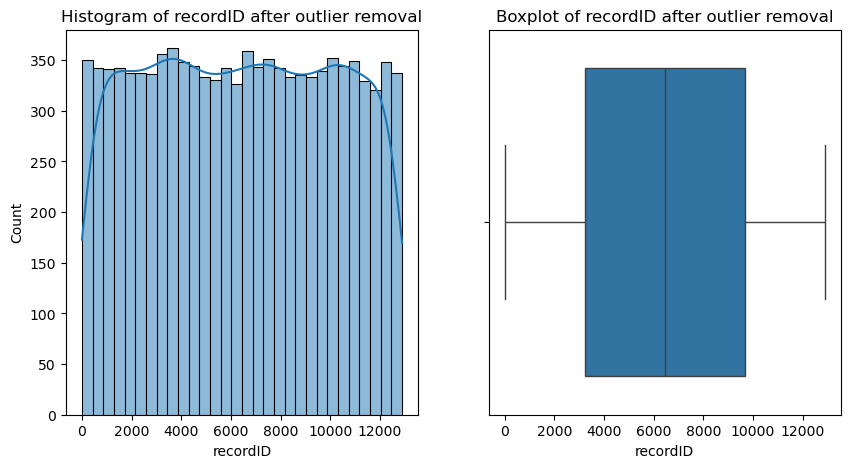

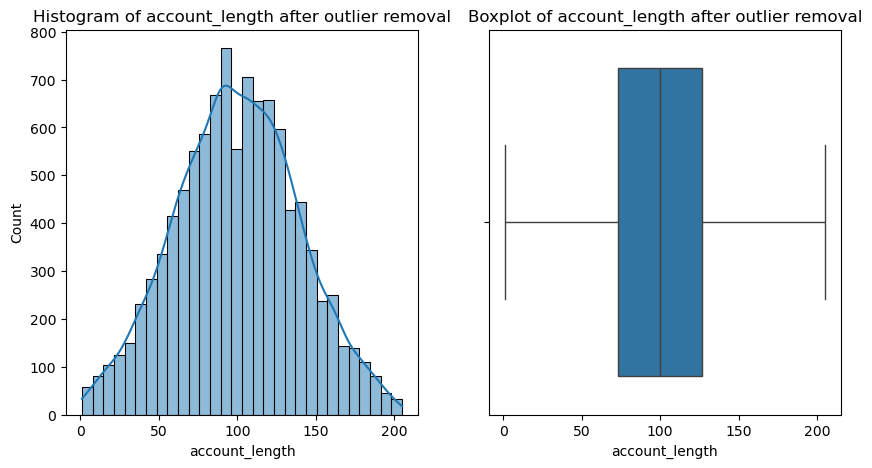

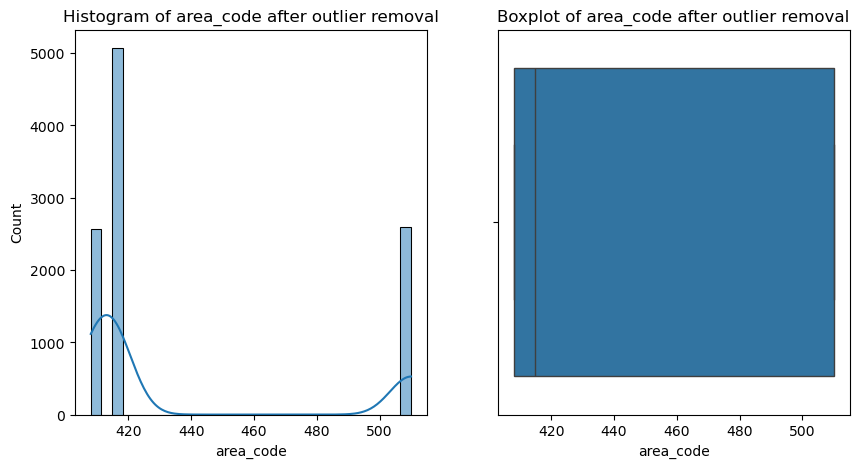

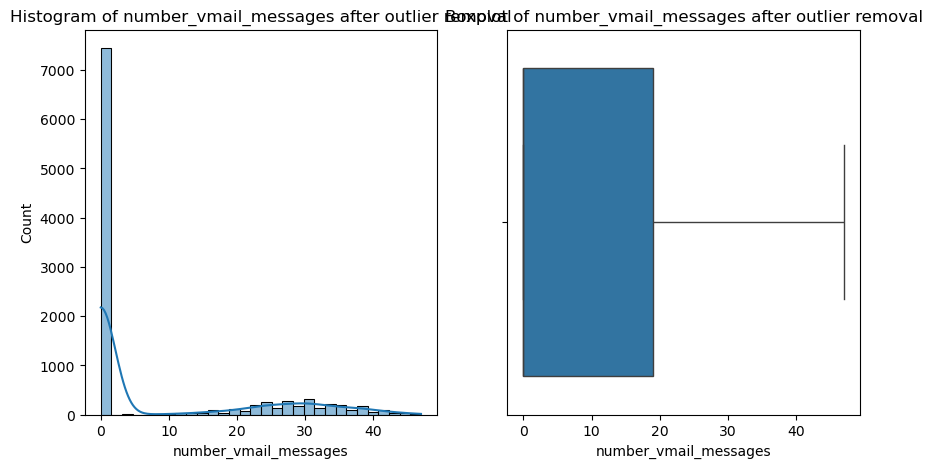

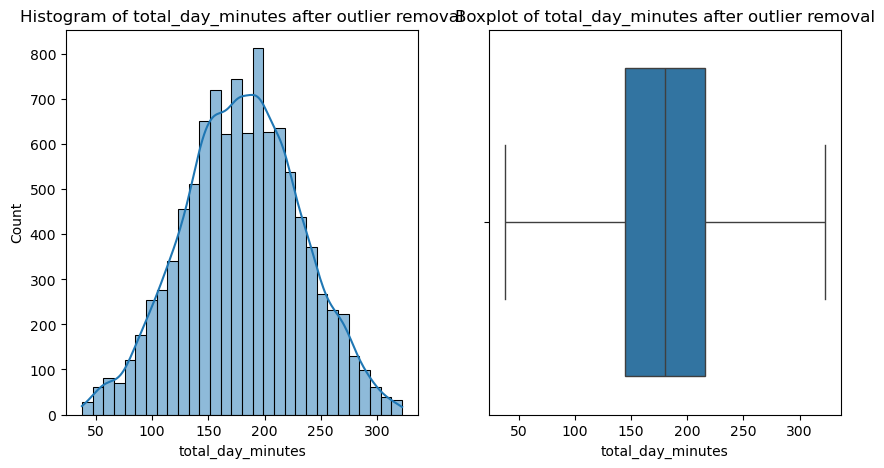

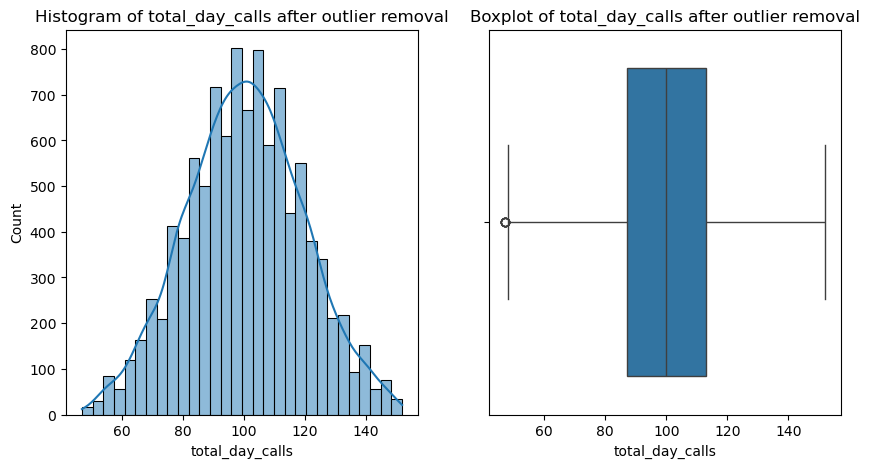

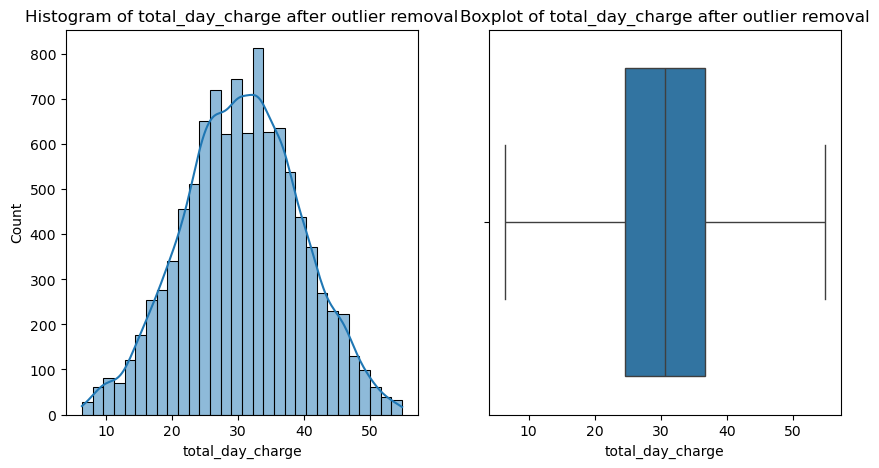

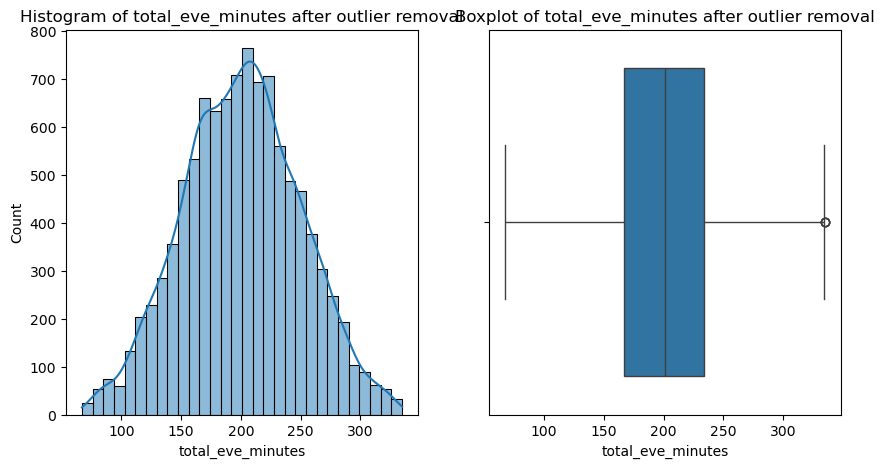

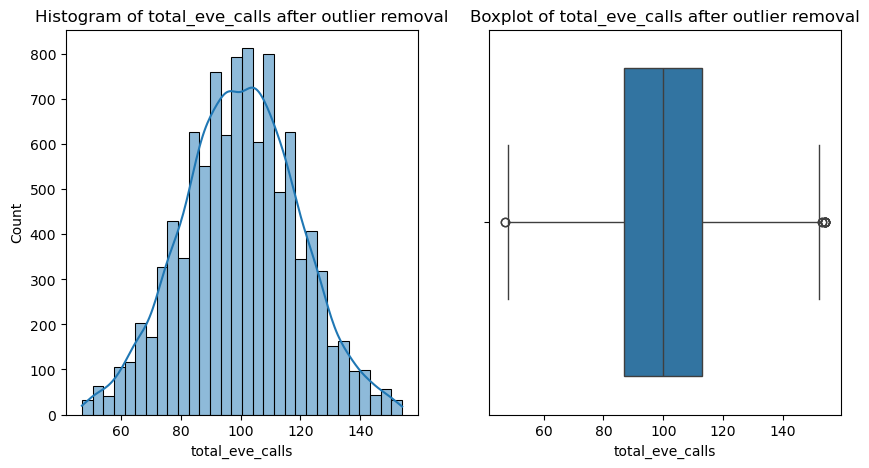

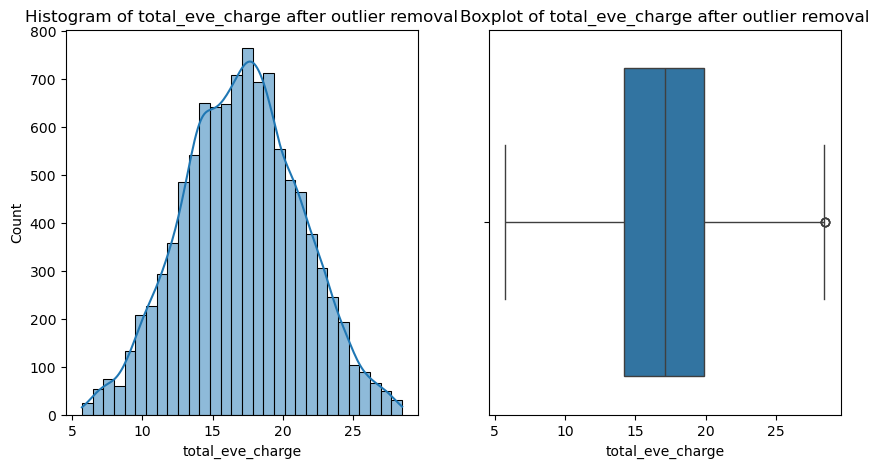

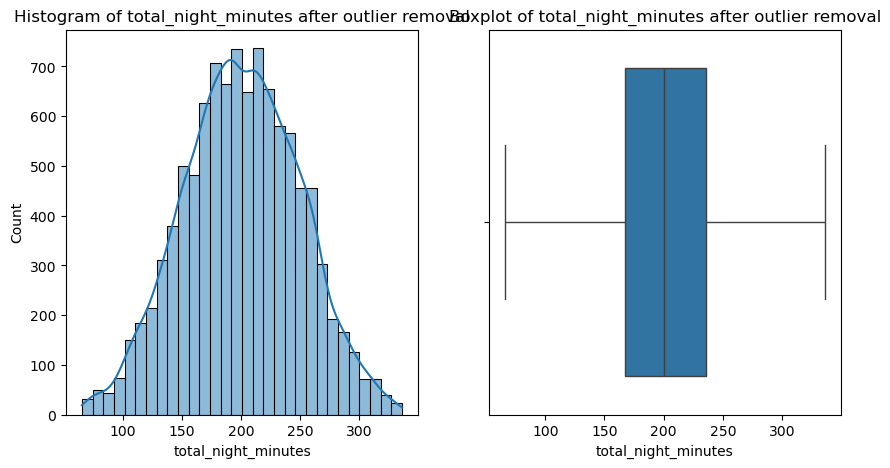

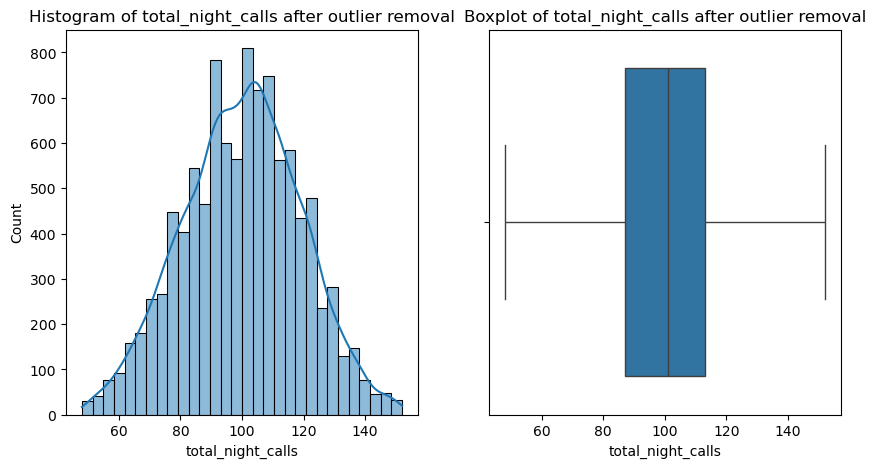

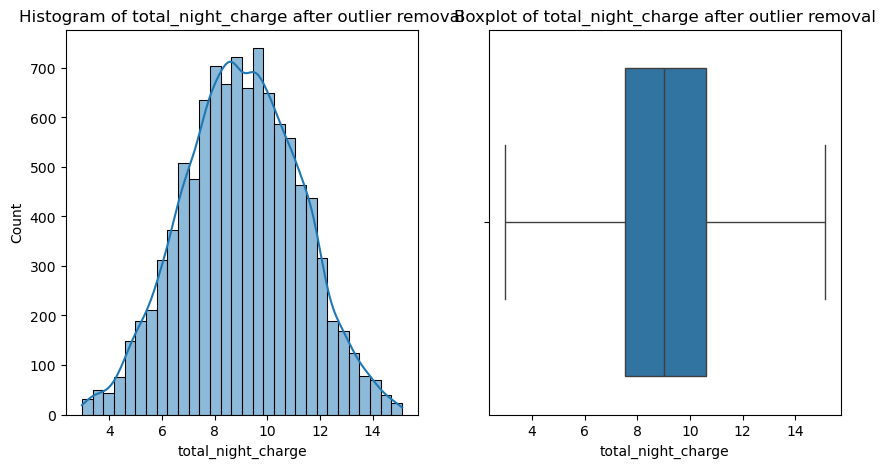

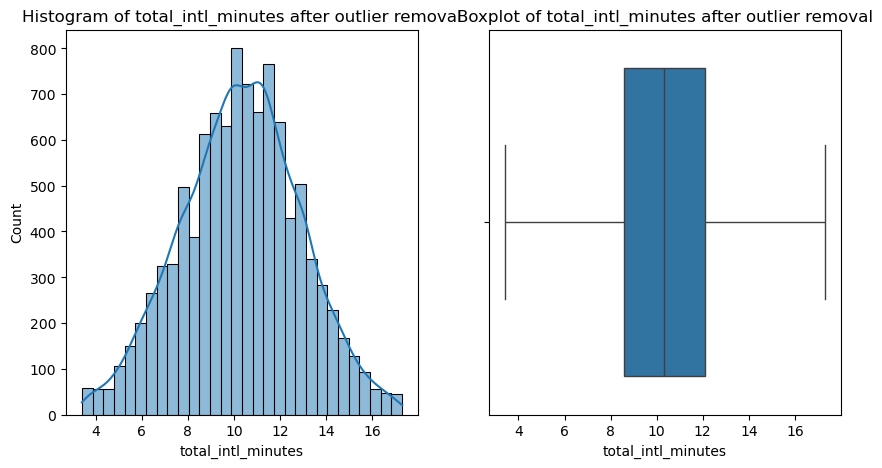

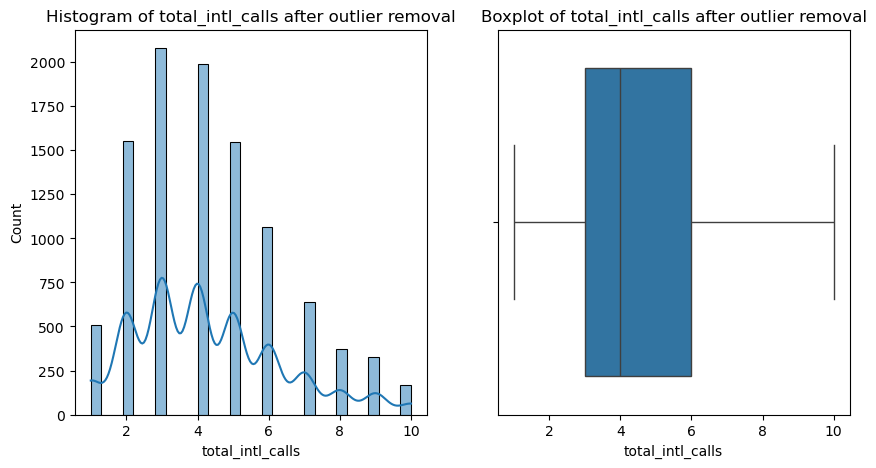

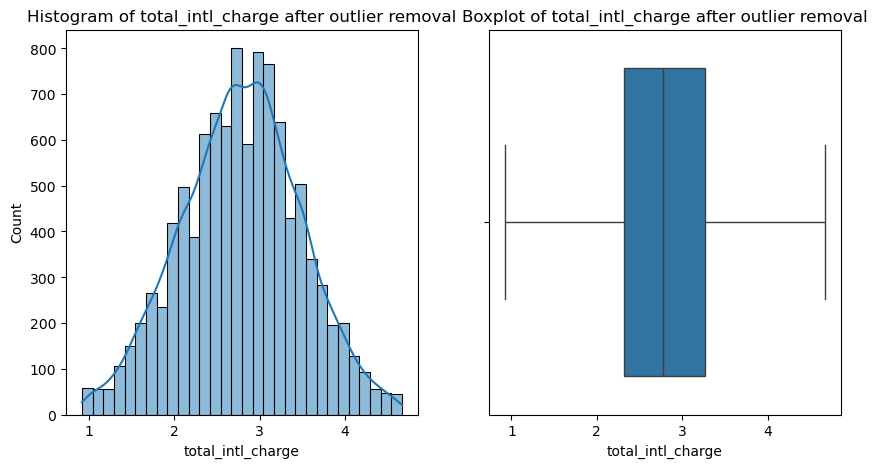

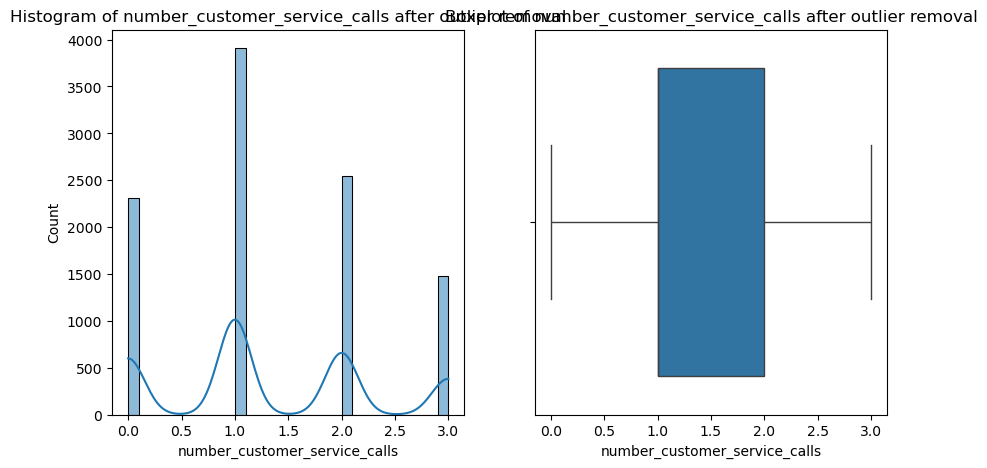

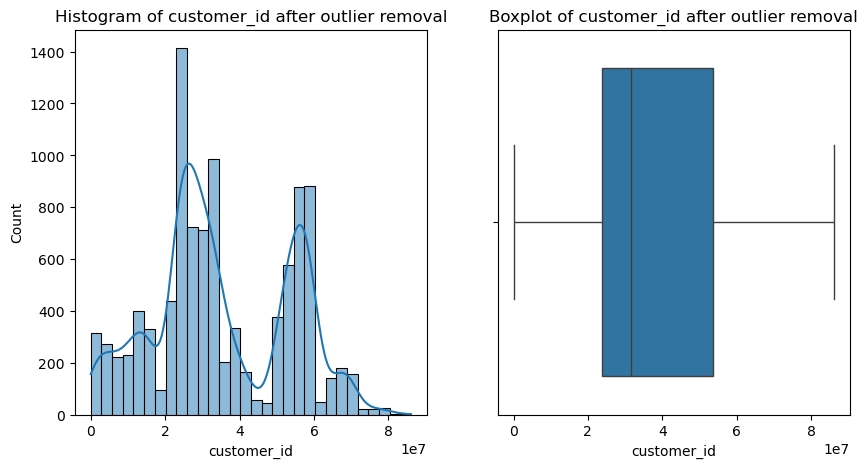

In [29]:
# Visualization after outlier removal
for column in numeric_columns:
    plt.figure(figsize=(10, 5))

    # Histogram
    plt.subplot(1,2,1)
    sns.histplot(cleaned_data[column],kde=True, bins=30)
    plt.title(f'Histogram of {column} after outlier removal')

    # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=cleaned_data[column])
    plt.title(f'Boxplot of {column} after outlier removal')

    plt.show()

#### Insights:
##### After removing outliers using IQR method,still the columns such as 'total_day_calls','total_eve_minutes','total_eve_calls','total_eve_charge' contain outliers 

In [31]:
def cap_outliers(df,columns):
    df_capped = df.copy()  # Make a copy of the original DataFrame
    for col in columns:
        # Calculate Q1,Q3,and IQR
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Calculate lower and upper whiskers
        lower_whisker = Q1 - 1.5 * IQR
        upper_whisker = Q3 + 1.5 * IQR

        # Cap the outliers to whisker limits
        df_capped[col] = df[col].clip(lower=lower_whisker,upper=upper_whisker)
    
    return df_capped

# Apply capping to numeric columns
cleaned_data_capped = cap_outliers(cleaned_data,numeric_columns)

In [32]:
cleaned_data_capped.select_dtypes(include = ["number"]).skew().sort_values(ascending=False)

number_vmail_messages            1.276086
area_code                        1.116063
total_intl_calls                 0.678555
number_customer_service_calls    0.275399
customer_id                      0.152169
account_length                   0.016707
total_eve_charge                 0.015843
total_eve_minutes                0.015798
total_day_calls                  0.011359
recordID                         0.006758
total_eve_calls                  0.001217
total_night_charge              -0.013745
total_night_minutes             -0.013754
total_day_minutes               -0.014555
total_day_charge                -0.014557
total_intl_charge               -0.040727
total_intl_minutes              -0.040798
total_night_calls               -0.045101
dtype: float64

In [33]:
cleaned_data_capped.shape

(10242, 22)

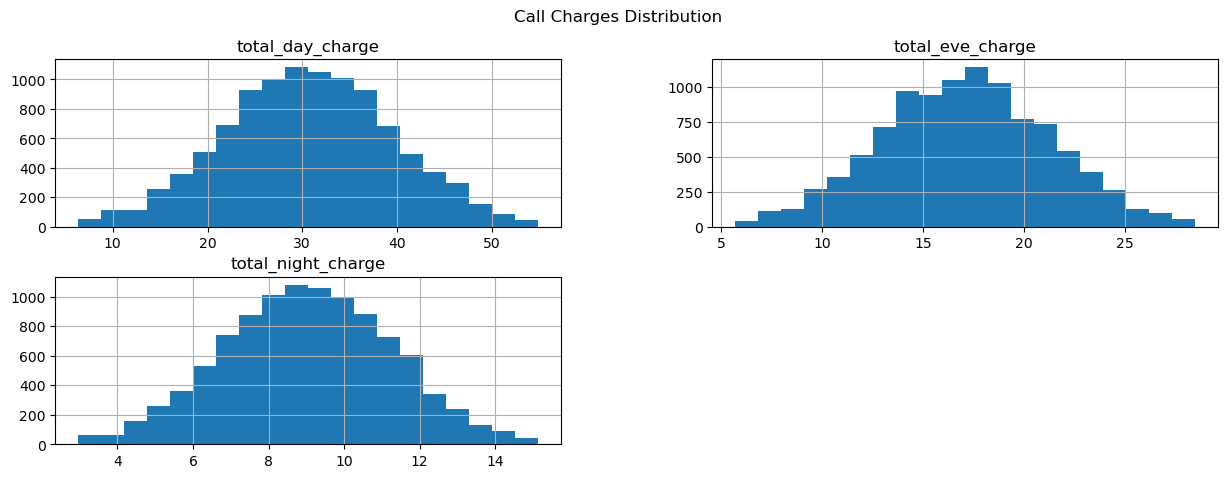

In [34]:
# Histogram for call charges distribution
cleaned_data_capped[['total_day_charge','total_eve_charge','total_night_charge']].hist(bins=20, figsize=(15,5))
plt.suptitle('Call Charges Distribution')
plt.show()


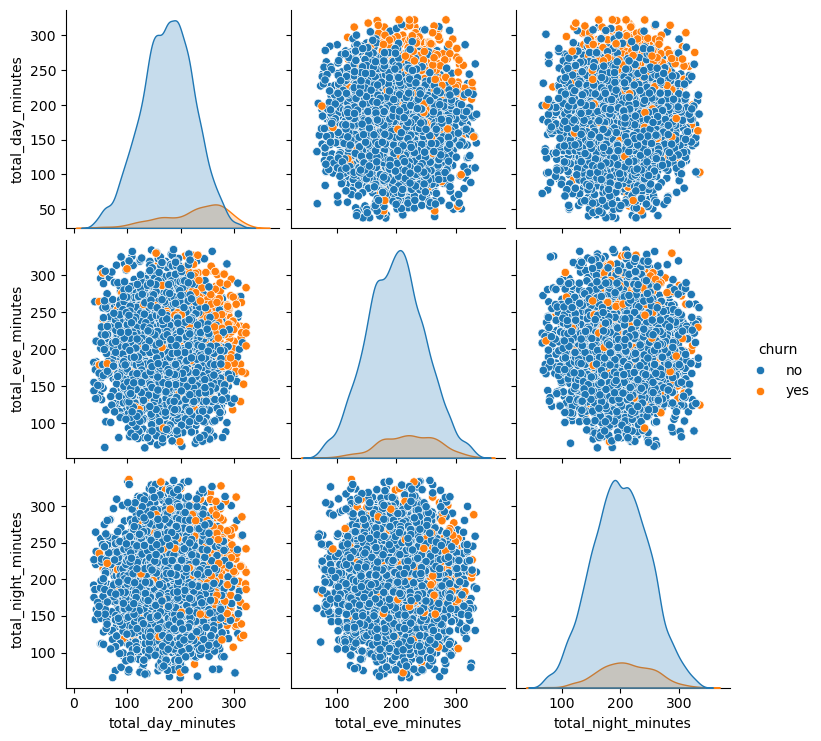

In [35]:
# Pair plot for key feature relationships
key_features = ['total_day_minutes','total_eve_minutes','total_night_minutes','churn']
sns.pairplot(cleaned_data_capped[key_features], hue='churn')
plt.show()


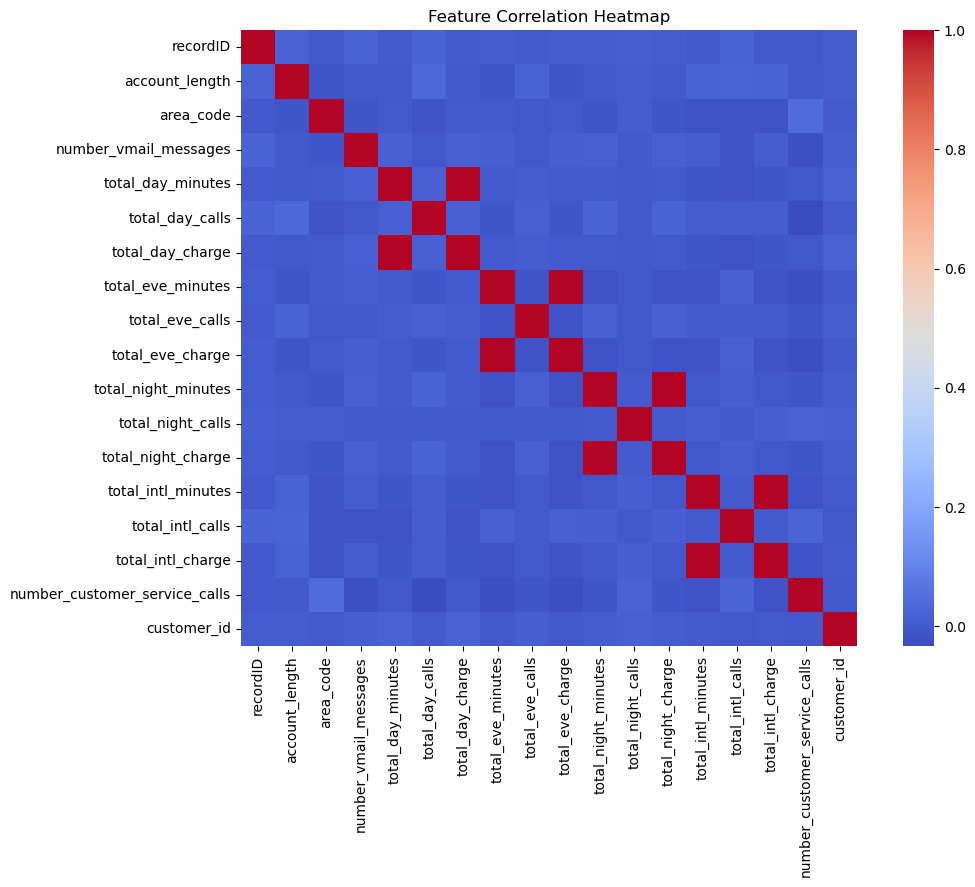

In [36]:
# Heatmap to check correlations between numerical features
corr = cleaned_data_capped.select_dtypes(include = ["number"]).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=False, cmap='coolwarm',square=True)
plt.title('Feature Correlation Heatmap')
plt.show()

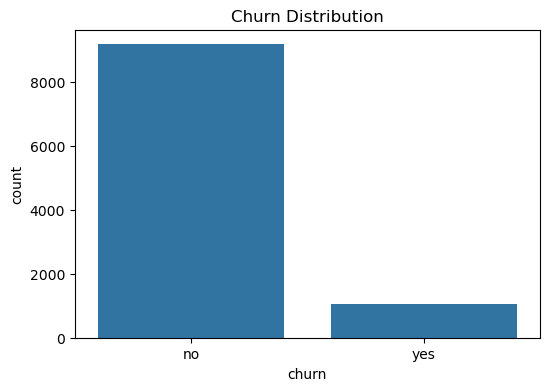

In [37]:
# Count plot for churn distribution
plt.figure(figsize=(6,4))
sns.countplot(x='churn',data=cleaned_data) 
plt.title('Churn Distribution')
plt.show()

#### Visualizations Insights:

##### Histogram : Used to understand call charges distribution.

##### Correlation Heatmap: Displayed feature relationships.

##### Pair Plot: Examined relationships between key variables.

##### Count plot: Checked churn distribution in the dataset.

## 7. Feature Engineering

In [40]:
cleaned_data_capped.drop(columns=['recordID','customer_id'],inplace = True)

In [41]:
cleaned_data_capped.head(2)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,HI,101,510,no,no,0,70.9,123,12.05,211.9,73,18.01,236.0,73,10.62,10.6,3,2.86,3,no
1,MT,137,510,no,no,0,223.6,86,38.01,244.8,139,20.81,94.2,81,4.24,9.5,7,2.57,0,no


##### Droped unnecessary columns like customer_id and recordID

#### Feature Encoding

In [44]:
# One-Hot Encoding of categorical valriables

categorical_columns = cleaned_data_capped.select_dtypes(include=['object']).columns
print("Categorical Columns:",categorical_columns)
# Apply One-Hot Encoding
df_encoded = pd.get_dummies(cleaned_data_capped,columns=categorical_columns,drop_first=True)

# Display first few rows of the transformed dataset
df_encoded.head()


Categorical Columns: Index(['state', 'international_plan', 'voice_mail_plan', 'churn'], dtype='object')


,account_length,area_code,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,...,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,international_plan_yes,voice_mail_plan_yes,churn_yes
0,101,510,0,70.9,123,12.05,211.9,73,18.01,236.0,...,False,False,False,False,False,False,False,False,False,False
1,137,510,0,223.6,86,38.01,244.8,139,20.81,94.2,...,False,False,False,False,False,False,False,False,False,False
2,103,408,29,294.7,95,50.10,237.3,105,20.17,300.3,...,False,False,False,False,False,False,False,False,True,False
3,99,415,0,216.8,123,36.86,126.4,88,10.74,220.6,...,False,False,False,False,False,False,False,False,False,False
4,108,415,0,197.4,78,33.56,124.0,101,10.54,204.5,...,False,False,False,False,False,False,False,False,False,False


## 8. Split data into Training and Testing Sets
##### Splitting the dataset into training and testing sets is essential to evaluate the model's performance.
##### The training set is used to train the machine learning model, while the testing set helps assess its accuracy on unseen data.

In [46]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df_encoded.drop(columns=['churn_yes'])  # Drop the target column
y = df_encoded['churn_yes']  # Target variable

In [47]:
# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [48]:
# Print the shape of the training and testing data
print("Training Data Shape:")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)

print("\nTesting Data Shape:")
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

Training Data Shape:
X_train: (8193, 68)
y_train: (8193,)

Testing Data Shape:
X_test: (2049, 68)
y_test: (2049,)


In [49]:
df.churn.value_counts()

churn
no     11069
yes     1823
Name: count, dtype: int64

##### Target variable churn is imbalanced 

## SMOTE (Synthetic Minority Over-sampling Technique)
#### SMOTE is a oversampling technique that can be applied to balance the churn class distribution.

In [52]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled,y_train_resampled = smote.fit_resample(X_train,y_train)

# Print the new dataset shape after resampling
print("Resampled Data Shape:")
print("X_resampled:",X.shape)
print("y_resampled:",y.shape)

# Check the class distribution after oversampling
print("Class distribution after oversampling:")
print(pd.Series(y_train_resampled).value_counts())

Resampled Data Shape:
X_resampled: (10242, 68)
y_resampled: (10242,)
Class distribution after oversampling:
churn_yes
False    7340
True     7340
Name: count, dtype: int64


#### Insights:
 ##### Before SMOTE,the dataset was imbalanced.After SMOTE,both classes have equal representation

## 9. Feature Scaling

In [55]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)  # Fit and transform on training data
X_test_scaled = scaler.transform(X_test)  
print(X_train_scaled.shape)  
print(X_test_scaled.shape)

(14680, 68)
(2049, 68)


#### Insights:
##### After applying StandardScaler, the numerical features in the dataset have been standardized to improve model performance and ensure uniformity across different features.

## 10. Feature Selection

#### SelectKBest
##### SelectKBest is a feature selection technique that selects the top k most important features based on statistical tests. It helps improve model performance by removing irrelevant or less significant features, reducing noise, and enhancing interpretability.

In [58]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Define the number of top features to select
k = 15  

# Initialize SelectKBest with Mutual Information Score
selector = SelectKBest(score_func=mutual_info_classif,k=k)

# Fit the selector on the training data
X_train_selected = selector.fit_transform(X_train_scaled,y_train_resampled)
X_test_selected = selector.transform(X_test_scaled)  # Apply same transformation to test set

# Get selected feature names
selected_features = X_train.columns[selector.get_support()]
print("\nTop",k,"Selected Features:\n",selected_features.tolist())

# Display feature importance scores
feature_scores = selector.scores_
sorted_features = sorted(zip(X_train.columns, feature_scores),key=lambda x:x[1],reverse=True)

print("\nFeature Importance Scores (Sorted):")
for feature,score in sorted_features[:k]:
    print(f"{feature}:{score:.4f}")


Top 15 Selected Features:
 ['account_length', 'area_code', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'international_plan_yes']

Feature Importance Scores (Sorted):
total_day_charge:0.3266
total_day_minutes:0.3216
total_intl_charge:0.2964
total_intl_minutes:0.2958
total_night_charge:0.2758
total_eve_charge:0.2628
total_eve_minutes:0.2608
total_night_minutes:0.2380
international_plan_yes:0.0913
area_code:0.0725
account_length:0.0429
number_vmail_messages:0.0334
total_intl_calls:0.0208
total_day_calls:0.0203
total_eve_calls:0.0185


### Insights:
##### We applied the SelectKBest technique to identify the most important features for churn prediction.
##### The selection was based on mutual information, ranking features by their contribution to the target variable.
##### The process helped eliminate redundant features, ensuring that only the most relevant variables were used for training.
##### This improves model performance, interpretability, and efficiency.

## 11. Build the ML Model

### Models
   ##### 1. Logistic Regression – A linear model used for binary classification, estimating the probability of a class using the logistic function.
    
##### 2. Random Forest – An ensemble learning method that builds multiple decision trees and combines their outputs for better accuracy and robustness.

  #####  3. Gradient Boosting – A boosting technique that sequentially improves weak learners (decision trees) by minimizing errors,often leading to high accuracy.

   ##### 4. Decision Tree – A tree-based model that splits data based on feature conditions,making it easy to interpret but prone to overfitting.

   ##### 5. K-Nearest Neighbors (KNN) – A non-parametric algorithm that classifies a data point based on the majority class of its nearest neighbors.


In [62]:
# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score

In [63]:
# List of models to train
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

In [64]:
# Train and evaluate models
results = {} #Stores results for each model
for name,model in models.items(): #iterate through model dictionary
    model.fit(X_train,y_train) # Train model on Traning data
    y_test_pred = model.predict(X_test) #predict on test data
    y_train_pred = model.predict(X_train) # predict on train data

    train_accuracy = accuracy_score(y_train,y_train_pred)
    test_accuracy = accuracy_score(y_test,y_test_pred)

    print(f"{name}:")
    print(f"Training Accuracy:{train_accuracy: .3f}")
    print(f"Testing Accuracy:{test_accuracy: .3f}")
    print()

C:\Users\rosep\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression:
Training Accuracy: 0.911
Testing Accuracy: 0.909

Random Forest:
Training Accuracy: 1.000
Testing Accuracy: 0.995

Gradient Boosting:
Training Accuracy: 0.979
Testing Accuracy: 0.974

Decision Tree:
Training Accuracy: 1.000
Testing Accuracy: 0.989

K-Nearest Neighbors:
Training Accuracy: 0.962
Testing Accuracy: 0.912



### Insights
##### 1. Logistic Regression: Achieves decent accuracy but may struggle with complex decision boundaries, indicating the dataset is not perfectly linearly separable.


##### 2. Random Forest: Provides very high accuracy but overfits the training data, which could lead to poor generalization on unseen data.


##### 3. Gradient Boosting: Maintains a strong balance between accuracy and generalization, making it the most reliable model for deployment.


##### 4. Decision Tree: Overfits significantly, leading to perfect training accuracy but slightly lower test accuracy. Pruning or limiting depth could improve performance.


##### 5. K-Nearest Neighbors (KNN): Performs moderately well but may benefit from hyperparameter tuning, such as adjusting the number of neighbors (k) or using a distance-weighted approach.

### Model Performance Comparison

In [67]:
# Model performance data  
data = {  
    "Model": ["Logistic Regression","Random Forest","Gradient Boosting","Decision Tree","K-Nearest Neighbors"],  
    "Training Accuracy": [0.911,1.000,0.979,1.000,0.962],  
    "Testing Accuracy": [0.909,0.995,0.960,0.974,0.912]  
}  

# Convert data to DataFrame  
df_data = pd.DataFrame(data)  

# Display the DataFrame  
print(df_data)

                 Model  Training Accuracy  Testing Accuracy
0  Logistic Regression              0.911             0.909
1        Random Forest              1.000             0.995
2    Gradient Boosting              0.979             0.960
3        Decision Tree              1.000             0.974
4  K-Nearest Neighbors              0.962             0.912


### Insights
##### 1. Gradient Boosting (97% accuracy) emerges as the best-performing model, maintaining a strong balance between training and testing accuracy, indicating good generalization.


##### 2. Decision Tree and Random Forest achieve high accuracy but show signs of overfitting, as their training accuracy is 100%, which may reduce their reliability on new data.


##### 3. K-Nearest Neighbors (96.2% accuracy) performs moderately well but might benefit from hyperparameter tuning, such as adjusting the number of neighbors (k).


##### 4. Logistic Regression (91% accuracy) performs decently but may not fully capture the complexity of the dataset due to its assumption of linear separability.


## Regularization

##### Regularization prevents overfitting by adding a penalty to complex models, improving their generalization to new data.

In [72]:
# Define models with regularization
models = {
    'Logistic Regression': LogisticRegression(penalty='l2',C=0.1,solver='lbfgs'),
    'Random Forest': RandomForestClassifier(n_estimators=100,max_depth=10,min_samples_split=5,min_samples_leaf=5),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100,learning_rate=0.1,max_depth=5),
    'Decision Tree': DecisionTreeClassifier(max_depth=10,min_samples_split=5,min_samples_leaf=5),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5)
}

# Train and evaluate models
for name,model in models.items():
    model.fit(X_train,y_train) # Train the model
    y_train_pred = model.predict(X_train) #predict on traning data
    y_test_pred = model.predict(X_test) # Predict on test data

    #compute traning and test accuracy
    train_accuracy = accuracy_score(y_train,y_train_pred)
    test_accuracy = accuracy_score(y_test,y_test_pred)

    print(f"{name}:")
    print(f"Training Accuracy: {train_accuracy:.3f}")
    print(f"Testing Accuracy: {test_accuracy:.3f}\n")

C:\Users\rosep\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression:
Training Accuracy: 0.909
Testing Accuracy: 0.908

Random Forest:
Training Accuracy: 0.974
Testing Accuracy: 0.962

Gradient Boosting:
Training Accuracy: 0.995
Testing Accuracy: 0.986

Decision Tree:
Training Accuracy: 0.978
Testing Accuracy: 0.966

K-Nearest Neighbors:
Training Accuracy: 0.962
Testing Accuracy: 0.912



#### Logistic Regression:
##### penalty='l2': Uses L2 regularization (Ridge) to prevent overfitting.
##### C=0.1: Controls regularization strength (lower values increase regularization).
##### solver='lbfgs': Optimization algorithm for fitting the model.

#### Random Forest:
##### n_estimators=100: Uses 100 decision trees in the ensemble.
##### max_depth=10: Limits tree depth to 10 levels to prevent overfitting.
##### min_samples_split=5: At least 5 samples required to split a node.
##### min_samples_leaf=5: Each leaf node must contain at least 5 samples to avoid deep trees.

#### Gradient Boosting:
##### n_estimators=100: Uses 100 boosting iterations.
##### learning_rate=0.1: Controls step size during boosting (smaller = better generalization).
##### max_depth=5: Limits tree depth to prevent overfitting.

#### Decision Tree:
##### max_depth=10: Prevents deep trees.
##### min_samples_split=5 and min_samples_leaf=5: Prevents overfitting by ensuring splits occur only if nodes have enough samples.

#### K-Nearest Neighbors (KNN):
##### n_neighbors=5: Uses 5 nearest neighbors to classify a new point.

## 12. Model Evaluation

In [74]:
# Dictionary to store results
results = {}
# Loop through each model and train it
for name, model in models.items():
    model.fit(X_train,y_train) # Train the model
    y_pred = model.predict(X_test) # Make predictions on the test set

    # Compute evaluation metrics
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred) 
    recall = recall_score(y_test,y_pred)  
    f1 = f1_score(y_test,y_pred)  
    roc_auc = roc_auc_score(y_test,y_pred) 

    # Store results
    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "ROC-AUC": roc_auc
    }

# Convert results to DataFrame and display
results_df = pd.DataFrame(results).T

# Sort the DataFrame by the 'Accuracy' column in descending order
results_df_sorted = results_df.sort_values(by="Accuracy",ascending=False)

# Display the sorted DataFrame
print(results_df_sorted)

C:\Users\rosep\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                     Accuracy  Precision    Recall  F1-Score   ROC-AUC
Gradient Boosting    0.985847   0.964646  0.896714  0.929440  0.946450
Decision Tree        0.966325   0.895604  0.765258  0.825316  0.877455
Random Forest        0.964373   1.000000  0.657277  0.793201  0.828638
K-Nearest Neighbors  0.911664   0.601266  0.446009  0.512129  0.705848
Logistic Regression  0.908248   0.777778  0.164319  0.271318  0.579436


In [75]:
# Find the best model
best_model_name = results_df['Accuracy'].idxmax()
print(f"\nBest Model: {best_model_name}")


Best Model: Gradient Boosting


## ROC Curve

##### The ROC (Receiver Operating Characteristic) curve is a graphical representation of a classification model's performance at different threshold values. It plots the True Positive Rate (TPR) against the False Positive Rate (FPR) to show how well a model distinguishes between classes.

##### AUC (Area Under the Curve) measures the overall ability of the model to differentiate between positive and negative classes—a higher AUC value (closer to 1) indicates better performance.

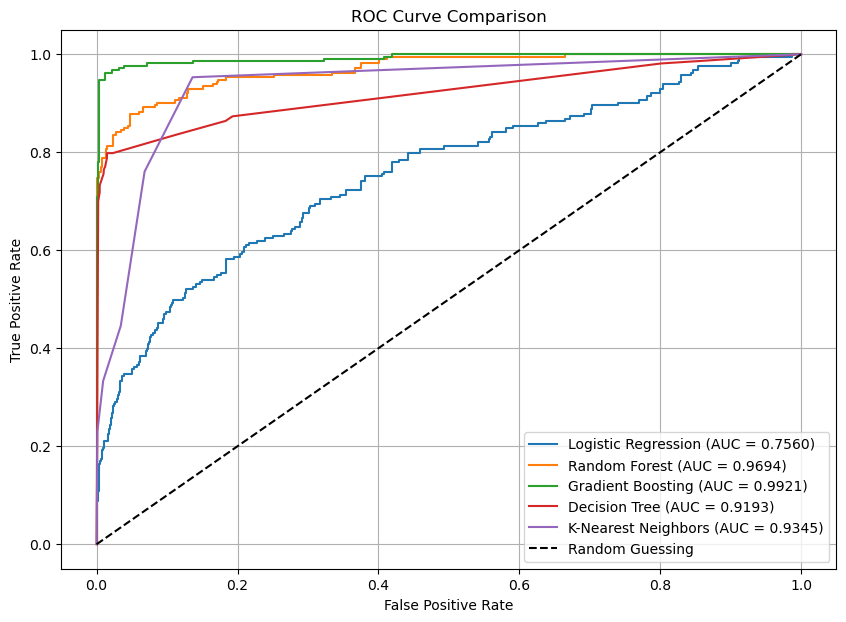

In [78]:
from sklearn.metrics import roc_curve,roc_auc_score

# Plot ROC Curve for all models
plt.figure(figsize=(10,7))

for name, model in models.items():
    # Ensure models support probability prediction
    if hasattr(model,"predict_proba"):
        y_prob = model.predict_proba(X_test)[:,1]  # Get probability for positive class
    else:
        continue  # Skip models without probability estimation

     # Compute ROC curve
    fpr,tpr, _ = roc_curve(y_test,y_prob)
    roc_auc = roc_auc_score(y_test,y_prob)  # Compute AUC

     # Plot ROC curve
    plt.plot(fpr,tpr,label=f"{name} (AUC = {roc_auc:.4f})")

# Plotting aesthetics
plt.plot([0, 1],[0, 1],'k--',label="Random Guessing")  # Diagonal reference line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right') # Legend to defferentiate model performance
plt.grid()
plt.show()

### Insights
##### The ROC Curve visually compares model performance by plotting the True Positive Rate (TPR) against the False Positive Rate (FPR).
##### 1. Gradient Boosting (AUC = 0.9921) achieves the highest AUC, making it the most effective model for this dataset.

##### 2. Random Forest (AUC = 0.9694) also demonstrates strong predictive power, performing slightly below Gradient Boosting.

##### 3. K-Nearest Neighbors (AUC = 0.9345) performs well and is a reliable classifier, though slightly behind Random Forest and Gradient Boosting.

##### 4. Decision Tree (AUC = 0.919) performs well but shows a slight decline in effectiveness compared to the top models.

##### 5. Logistic Regression (AUC = 0.7560) performs the worst among the models but is still better than random guessing (AUC = 0.5), indicating that it captures some useful patterns but struggles due to dataset complexity.


## Hyperparameter Tunning

### Hyperparameter tuning is the process of optimizing the parameters that control the learning process of a machine learning model to improve its performance.
### It helps in reducing overfitting, underfitting, and improving accuracy, precision, recall, and other evaluation metrics.

##### 1. Gradient Boosting achieved the highest accuracy (98.21%) and a strong ROC-AUC score (0.9919), making it the best-performing model.


##### 2. Random Forest and Decision Tree also performed well, with accuracy scores of 96.20% and 94.41%, respectively. However, they show signs of overfitting compared to Gradient Boosting.


##### 3. K-Nearest Neighbors (AUC = 0.9345) performed reasonably well but was slightly less effective than the top models.


##### 4. Logistic Regression (AUC = 0.7560) had the lowest performance, indicating that it struggles with the dataset’s complexity.

#### Therefore, based on these results, hyperparameter tuning is not strictly required, but fine-tuning could be considered for Gradient Boosting and Decision Tree to achieve even better results.

## 14. Pipeline
#### A pipeline is a series of automated steps that streamline workflows by processing inputs sequentially. Commonly used in software development, data engineering, and machine learning, pipelines automate tasks like building, testing, deploying, and data transformation, ensuring efficient and reliable operations.

In [80]:
import joblib
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingClassifier

# Identify categorical and numerical features
num_features = X.select_dtypes(include=['int64','float64']).columns
cat_features = X.select_dtypes(include=['object']).columns

# Define preprocessing steps
preprocessor = ColumnTransformer([
    ('num',Pipeline([
        ('imputer',SimpleImputer(strategy='mean')),  # Handles missing values
        ('scaler',StandardScaler())
    ]),num_features),
    
    ('cat',Pipeline([
        ('imputer',SimpleImputer(strategy='most_frequent')),  # Handles missing categorical values with most common category
        ('encoder',OneHotEncoder(handle_unknown='ignore'))  # Ignores unseen categories
    ]),cat_features)
])
best_model= GradientBoostingClassifier(n_estimators=100)
# Create the full pipeline
pipeline = Pipeline([
    ('preprocessor',preprocessor), #cleans and transforms the data
    ('classifier',best_model)  
])
# Fit the pipeline on training data
pipeline.fit(X_train,y_train)
print(pipeline)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['account_length', 'area_code', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('im

### Pipeline Overview

##### The project uses a Scikit-learn pipeline to preprocess data and train a Gradient Boosting Classifier for customer churn prediction.

#### Numerical Features:

##### Missing values imputed with the mean strategy.

##### Scaled using StandardScaler for normalization.


#### Categorical Features:

##### Missing values filled with the most frequent value.

##### Encoded using OneHotEncoder (ignoring unknown categories).

#### Model

##### Uses Gradient Boosting Classifier (100 estimators) for robust and efficient learning.

#### Pipeline Workflow

##### 1. Preprocessing (Imputation, Scaling, Encoding).

##### 2. Model Training (Gradient Boosting Classifier).

##### 3. Prediction on Unseen Data using the trained pipeline.

##### This ensures data consistency, automation, and scalability for predictive analysis.

### Save the Pipeline

In [82]:
# Save pipeline
joblib.dump(pipeline,"customer_churn_pipeline.pkl")
print("pipeline saved successfully")

pipeline saved successfully


### Load the saved Pipeline and Unseen Data

In [84]:
# Load the saved pipeline
pipeline_load = joblib.load("customer_churn_pipeline.pkl")

# Load unseen data
data_new_unseen = pd.read_csv("unseen_data.csv")

### 15. Test With Unseen Data

In [86]:
data_new_unseen.shape

(8, 21)

In [88]:
data_new_unseen.head()

,recordID,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,customer_id
0,12893,MT,164,510,yes,yes,41,285.096538,147,6.372150,...,33,4.192670,391.984379,173,10.745920,18.101577,17,5.002395,5,1.128063e+15
1,12894,MD,143,415,yes,no,45,85.005396,43,54.568081,...,90,21.588605,116.568056,72,5.053741,15.044285,16,1.431473,6,1.368496e+13
2,12895,TX,61,415,yes,yes,31,202.086999,70,46.133844,...,54,3.538651,195.126267,54,3.700816,12.491492,1,5.354803,8,2.580219e+15
3,12896,MN,75,415,yes,no,27,270.058550,28,25.318659,...,123,24.205956,198.797836,55,13.810646,18.476494,14,1.375066,3,2.042344e+15
4,12897,MD,159,408,yes,no,51,276.857187,77,50.062608,...,165,7.629469,243.525101,115,17.668308,3.204551,5,1.424218,3,3.078895e+15


In [92]:
unseen_predict = pipeline_load.predict(data_new_unseen).astype(int)
print(unseen_predict)

[1 0 0 1 0 1 1 1]


### Insights
##### The output [1 0 0 1 0 1 1 1] represents churn predictions for 8 customers.

##### 1 (Churn) → The model predicts that the customer is likely to leave.

##### 0 (No Churn) → The customer is predicted to stay.

##### The results help businesses take proactive retention strategies for customers predicted to churn.

### 16. Interpretation of Results (Conclusion):

##### The Gradient Boosting Classifier effectively predicts customer churn based on historical data.

##### Model performance depends on data quality, feature relevance, and handling of missing values.

#### Limitations:

##### Potential bias due to imbalanced classes (if churn cases are fewer).

##### Certain categorical variables may not contribute significantly to predictions.

##### Model accuracy may vary if customer behavior changes over time.


### 17. Future Work:

Explore deep learning models (e.g., Neural Networks) for potentially better accuracy.

Periodically retrain the model with new customer data to maintain relevance.

Handle class imbalance using oversampling (SMOTE) or undersampling techniques.

Feature Engineering: Introduce new attributes like customer complaints, usage trends, or service feedback to improve predictive performance.




### Thank You